# Ejercicio ML 1: Heart
El dataset seleccionado para el proyecto es el de heart, el cual habla sobre pacientes que sufrieron y no sufrieron ataques cardíacos.<br>
El dataset se compone de:

- age --> edad en años
- sex --> (1 = masculino; 0 = femenino)
- cp --> tipo de ataque al corazón
- trestbps --> presión arterial en reposo (mm Hg)
- chol --> colesterol (mg/dl)
- fbs --> fbs - glucemia en ayunas, fbsr > 120 mg/dl = 1(true), sino 0(false)
- restecg --> electrocardiográfico en reposo (1=true, 0=false)
- thalach --> máxima frecuencia cardíaca alcanzada
- exang --> ejercicio indujo angina (1=true, 0=false)
- oldpeak --> densenso del ST inducido por el ejercicio
- slope --> pico de la pendiente del ST durante el ejercicio
- ca --> número de vasos principales (0-3) coloreados por la floración
- thal --> transtorno talasemia (3=normal, 6=fixed defect, 7=reversable defect)
- target --> tiene enfermedad cardíaca (1=true, 0=false)



In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



## 1 - Recolectar los datos

In [ ]:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/heart.csv > heart.csv
    else:
        !wget geart.csv https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/heart.csv

--2021-11-27 13:03:48--  http://geart.csv/
Resolving geart.csv (geart.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘geart.csv’
--2021-11-27 13:03:48--  https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  10.77K  --.-KB/s    in 0s      

2021-11-27 13:03:49 (34.4 MB/s) - ‘heart.csv’ saved [11024/11024]

FINISHED --2021-11-27 13:03:49--
Total wall clock time: 0.3s
Downloaded: 1 files, 11K in 0s (34.4 MB/s)


In [ ]:
df = pd.read_csv('heart.csv')

### 2 - Explorar datos

In [ ]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Se puede ver que no hay elementos faltantes (NaN) como tampoco hay variables categóricas texto.

In [ ]:
# Cantidad de filas a analizar
print('Cantidad de filas del dataset:', df.shape[0])

Cantidad de filas del dataset: 303


In [ ]:
# Analizar que tan balanceado esta el dataset respecto a taget
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Se puede ver que el dataset está bastante balanceado, hay más casos con enfemedad cardíaca.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3 - Procesamiento de los datos
Hay datos que corresponden a multiclase, para mejorar su tratamiento por el modelo realizaremos OneHotEncoding para separar las clases en columnas. Clases para codigicar:
- cp
- slope
- thal

Otros tipos de datos entre las columnas:

- Hay otras columnas (como sex, restecg) que son clases binarias por lo que no es necesario una transformación
- Hay otras columnas (como age, ca) que representan una "cantidad" por lo que no es necesario codigicar pero sin normalizar.

In [ ]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
cp = pd.get_dummies(df['cp'], prefix = "cp")
cp.head()

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


Este mismo trabajo se realiza con el resto de las columnas multiclase

In [ ]:
slope = pd.get_dummies(df['slope'], prefix = "slope")
slope.head()

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
thal = pd.get_dummies(df['thal'], prefix = "thal")
thal.head()

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
# Descartar las viejas coulmnas de estos datos:
df2 = df.drop(['cp', 'slope', 'thal'], axis=1)

In [ ]:
# Agregar las nuevas columnas codigicada como OneHoyEncoding
df2 = df2.join([cp, slope, thal])
df2

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,1,0,0,0,0,1,0,0,0,0,1
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,0,1,0,1,0,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,2,0,1,0,0,0,0,1,0,0,0,0,1
301,57,1,130,131,0,1,115,1,1.2,1,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Separar los datos en entrada/feature (X) y salida/target (y)
y = df2['target'].values
X_data = df2.drop(['target'], axis=1)

In [ ]:
# Por último, normalizamos la data de entrada
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X_data)
print(X)

[[0.70833333 1.         0.48113208 ... 1.         0.         0.        ]
 [0.16666667 1.         0.33962264 ... 0.         1.         0.        ]
 [0.25       0.         0.33962264 ... 0.         1.         0.        ]
 ...
 [0.8125     1.         0.47169811 ... 0.         0.         1.        ]
 [0.58333333 1.         0.33962264 ... 0.         0.         1.        ]
 [0.58333333 0.         0.33962264 ... 0.         1.         0.        ]]


## 4 - Preparar los datos de entrenamiento
- Ahora que ya tenemos todos los datos, podemos compararlos en una matriz de correlación para ver el aporte de cada feature a la salida.
- Luego separar los datos en datos de train y de test para probar contra "N" modelos.


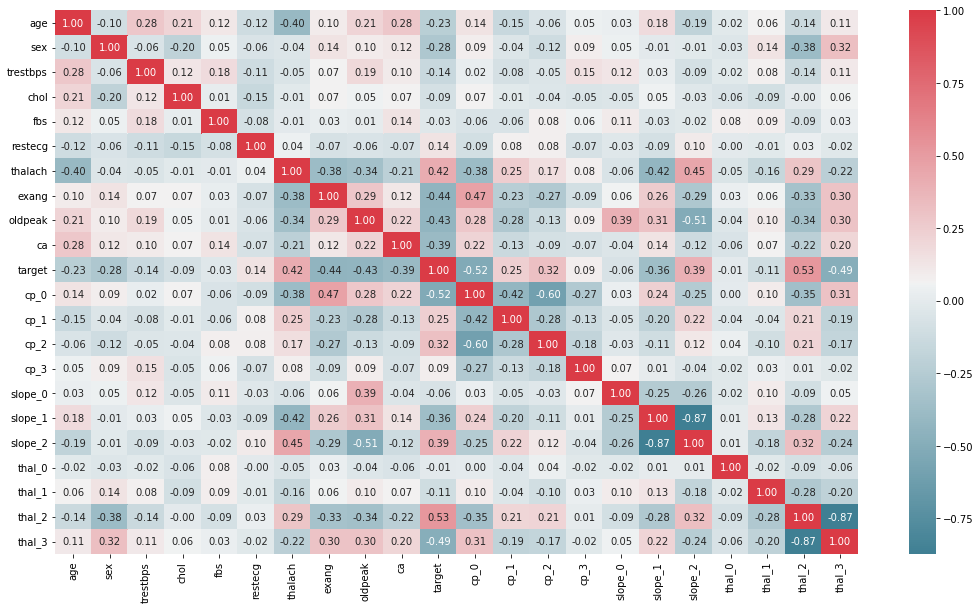

In [ ]:
corr = df2.corr()
fig, ax1 = plt.subplots(1, figsize=(18, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

En general la mayoría de los features están muy relacionados con la salida, algunas clases como cp_0, cp_3, thal_0 están menos relacionadas (pero son parte de cp y thal)

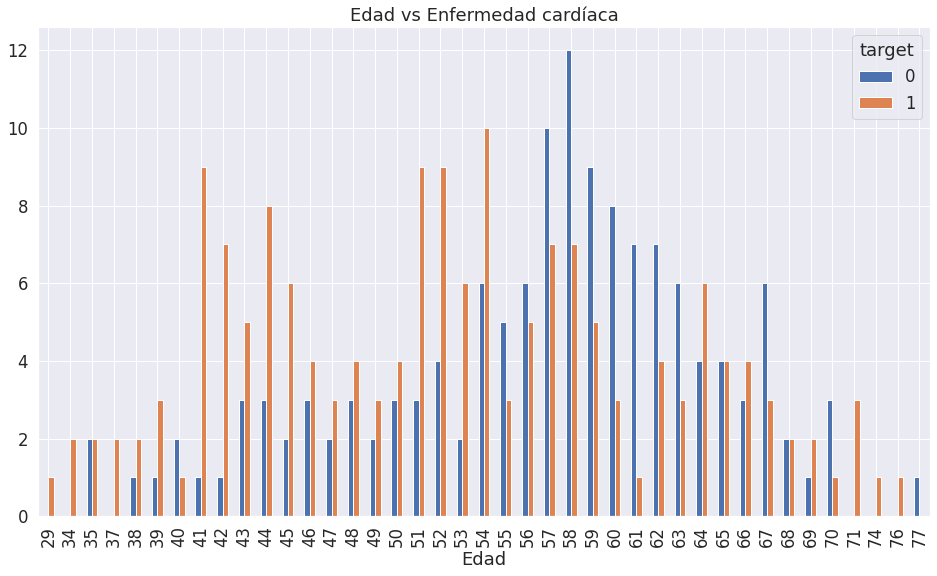

In [ ]:
ct = pd.crosstab(df2['age'], df2['target'])
ct.plot(kind="bar",figsize=(16,9))
plt.title('Edad vs Enfermedad cardíaca')
plt.xlabel('Edad')
plt.show()

Según el análsis del gráfico anterior pareciera ser que las edades entre 40 y 50 años tiene mayor probabilidad de tener enfermedades cardíacas. ¿Será eso cierto? Por qué ya vimos que no había una alta correlación entre las edades y la salida.
Analicemos la distribución de las edades "puestas en observación":

Promedio de las edades evaluadas: 54.366336633663366


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Edad')

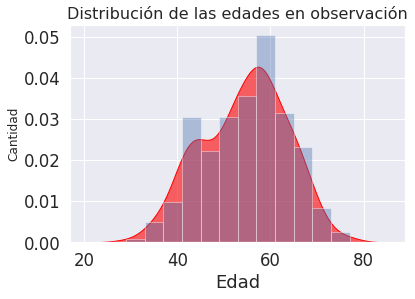

In [ ]:
print("Promedio de las edades evaluadas:", df2['age'].mean())

ax = sns.distplot(df2['age'], kde=True, kde_kws={"color": "red", "alpha":0.6, "linewidth": 1, "shade":True })
ax.set_title("Distribución de las edades en observación", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Edad')

Se puede ver que la mayoría de las personas puestas en observación son entre 50 y 60 años, no es una distribución uniforme. Es por esto que puede llegar a existir el sesgo en las edades que se alejan del promedio o mediana de esta distribución (hay que tener en cuenta que esto podría sesgar al algoritmo).

Mismo análisis pero ahora del sexo

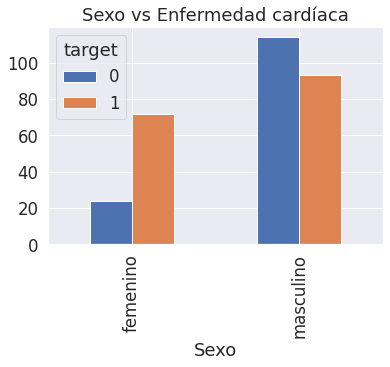

In [ ]:
ct = pd.crosstab(df2['sex'].replace({0: 'femenino', 1: 'masculino'}), df2['target'])
ct.plot(kind="bar")
plt.title('Sexo vs Enfermedad cardíaca')
plt.xlabel('Sexo')
plt.show()

Pareciera ser que el sexo femenino tiene mayor tendencia a los ataques cardíacos, pero ¿están balanceadas las muestras respecto al sexo?

In [ ]:
df2['sex'].replace({0: 'femenino', 1: 'masculino'}).value_counts()

masculino    207
femenino      96
Name: sex, dtype: int64

Claramente no! Otro valor que podría sesgar al modelo.

## 5 - Entrenar los modelos
- Entrenar diferentes modelos y encontrar el mejor performante contra el dataset de test. Para eso se utilizarán los siguientes algoritmos de clasificación:
 - Decision Tree
 - Random Forest
 - Logistic Regresion
 - KNN
 - SVM Classifier
 - AdaBoost Classifier
 - XGBoost Classifier

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble  import AdaBoostClassifier
import xgboost as xgb

In [ ]:
# Separar los datos de entrenamiento (train) y de prueba (test) 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

classifier = []
accuracy = []

In [ ]:
class ModelCompare():
    def __init__(self):
        self.name = ""
        self.model = None
        self.accuracy = 0
        self.f1_score = 0

    def it2hp(self, it):
        # itearation_to_hyperparameter
        raise NotImplemented

    def fit(self, X_train, y_train, hp):
        raise NotImplemented
    
    def compare(self, X_train, y_train, X_test, y_test, iteration=100):
        models = []

        mean_acc = np.zeros((iteration))
        std_acc = np.zeros((iteration))
        f1_scores = np.zeros((iteration))

        for it in range(iteration):
            # Train de model
            model = self.fit(X_train, y_train, self.it2hp(it+1))

            # Predict
            y_hat = model.predict(X_test)   

            # Evaluar el modelo
            mean_acc[it] = metrics.accuracy_score(y_test, y_hat)    
            std_acc[it] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
            f1_scores[it] = metrics.f1_score(y_test, y_hat)
            models.append(model)

        plt.plot(range(1, iteration+1), mean_acc,'darkBlue')
        plt.fill_between(range(1, iteration+1), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
        plt.legend(('Accuracy ', '+/- std'))
        plt.ylabel('Accuracy ')
        plt.xlabel('hp')
        plt.tight_layout()
        plt.show()

        print(f"La mejor exactitud se obtuvo con {mean_acc.max():.2f} con hp={self.it2hp(mean_acc.argmax()+1)}")
        print(f"El mejor f1_score se obtuvo con {f1_scores.max():.2f} con hp={self.it2hp(mean_acc.argmax()+1)}")
        self.model = models[mean_acc.argmax()]
        self.accuracy = mean_acc.max()
        self.f1_score = f1_scores[mean_acc.argmax()]
      

class DecisionTreeCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "DecisionTreeClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        return DecisionTreeClassifier(criterion="entropy", max_depth = hp).fit(X_train,y_train)


class RandomForestCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "RandomForestClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        return RandomForestClassifier(n_estimators=hp, random_state=1, class_weight = 'balanced').fit(X_train,y_train)


class LogisticRegresionCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "LogisticRegression"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it / 100

    def fit(self, X_train, y_train, hp):
        return LogisticRegression(C=hp, solver='sag').fit(X_train,y_train)


class KNNCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "KNeighborsClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        return KNeighborsClassifier(n_neighbors = hp).fit(X_train,y_train)


class SVCCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "SupportVectorMachine"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        return SVC().fit(X_train,y_train)

class AdaBoostCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "AdaBoostClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        return AdaBoostClassifier(n_estimators=hp).fit(X_train,y_train)

class XGBoostCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "XGBClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        return xgb.XGBClassifier(objective="binary:logistic", n_estimators=hp, random_state=42).fit(X_train, y_train)

In [ ]:
classifier = []
accuracy = []

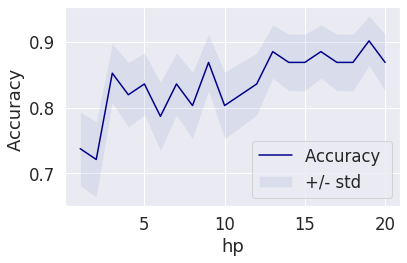

La mejor exactitud se obtuvo con 0.90 con hp=19
El mejor f1_score se obtuvo con 0.91 con hp=19


In [ ]:
model_compare = RandomForestCompare()
model_compare.compare(X_train, y_train, X_test, y_test, 20)
classifier.append(model_compare.name)
accuracy.append(model_compare.accuracy)

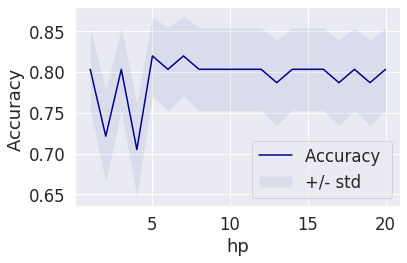

La mejor exactitud se obtuvo con 0.82 con hp=5
El mejor f1_score se obtuvo con 0.82 con hp=5


In [ ]:
model_compare = DecisionTreeCompare()
model_compare.compare(X_train, y_train, X_test, y_test, 20)
classifier.append(model_compare.name)
accuracy.append(model_compare.accuracy)

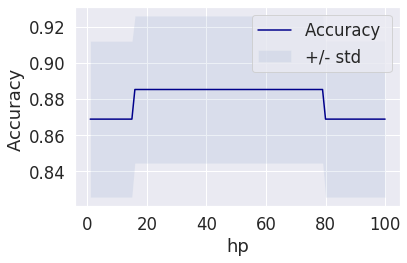

La mejor exactitud se obtuvo con 0.89 con hp=0.16
El mejor f1_score se obtuvo con 0.88 con hp=0.16


In [ ]:
model_compare = LogisticRegresionCompare()
model_compare.compare(X_train, y_train, X_test, y_test)
classifier.append(model_compare.name)
accuracy.append(model_compare.accuracy)

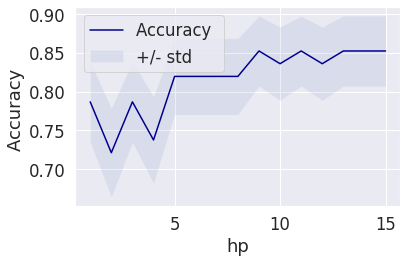

La mejor exactitud se obtuvo con 0.85 con hp=9
El mejor f1_score se obtuvo con 0.85 con hp=9


In [ ]:
model_compare = KNNCompare()
model_compare.compare(X_train, y_train, X_test, y_test, 15)
classifier.append(model_compare.name)
accuracy.append(model_compare.accuracy)

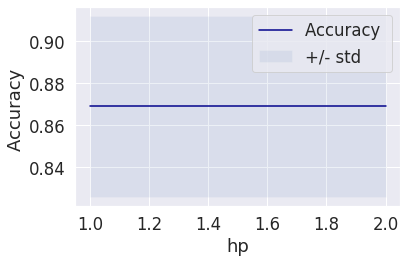

La mejor exactitud se obtuvo con 0.87 con hp=1
El mejor f1_score se obtuvo con 0.87 con hp=1


In [ ]:
model_compare = SVCCompare()
model_compare.compare(X_train, y_train, X_test, y_test, 2)
classifier.append(model_compare.name)
accuracy.append(model_compare.accuracy)

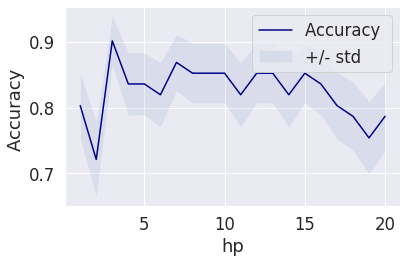

La mejor exactitud se obtuvo con 0.90 con hp=3
El mejor f1_score se obtuvo con 0.91 con hp=3


In [ ]:
model_compare = AdaBoostCompare()
model_compare.compare(X_train, y_train, X_test, y_test, 20)
classifier.append(model_compare.name)
accuracy.append(model_compare.accuracy)

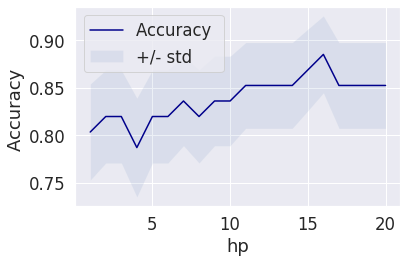

La mejor exactitud se obtuvo con 0.89 con hp=16
El mejor f1_score se obtuvo con 0.89 con hp=16


In [ ]:
model_compare = XGBoostCompare()
model_compare.compare(X_train, y_train, X_test, y_test, 20)
classifier.append(model_compare.name)
accuracy.append(model_compare.accuracy)

## 6 - Contrastar resultados

Text(0.5, 1.0, 'Classifier type')

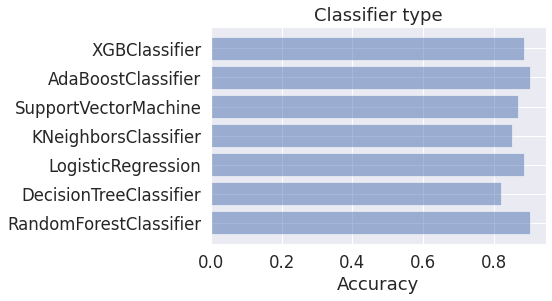

In [ ]:
y_pos = np.arange(len(classifier))
plt.barh(y_pos, accuracy, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Accuracy')
plt.title('Classifier type')

In [ ]:
from operator import itemgetter
index, element = max(enumerate(accuracy), key=itemgetter(1))
print(index)
print(element)

0
0.9016393442622951


In [ ]:
# Best Classifier
print(f"El mejor clasificador fue {classifier[index]}, con un accuracy {accuracy[index]:.2f}")

El mejor clasificador fue RandomForestClassifier, con un accuracy 0.90


## 7 - Conclusiones
A lo largo del notebook se preparó el dataset para correr diferentes clasificadores y terminar la accuracy de cada uno en las predicciones realizadas.<br>
Finalmente se ensayaron diversos modelos y se obtuvo el màs performante, aunque se puede observar que la mayorìa obtuvo excelentes resultados